In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from main import MutHook

In [13]:
data = pickle.load(open('./results/1603676581.2557468_full_100_trials.pickle', 'rb'))

In [14]:
names = data['names']
data = data['results']

In [15]:
names

['q_mutual',
 'adp_sharing_tuples',
 'q_standard',
 'adp_standard',
 'single_agent_mutual']

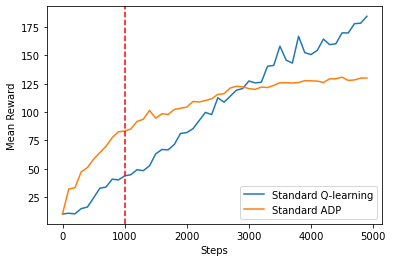

In [16]:
xticks = np.arange(50) * 100
plt.plot(xticks, np.mean(data, axis=0).T[2], label='Standard Q-learning')
plt.plot(xticks, np.mean(data, axis=0).T[3], label='Standard ADP')
plt.axvline(1000, color='r', ls='--')

plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()

plt.savefig('./figs/standards.png')

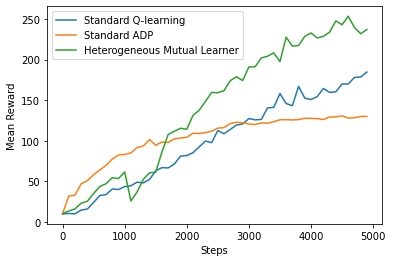

In [17]:
xticks = np.arange(50) * 100
plt.plot(xticks, np.mean(data, axis=0).T[2], label='Standard Q-learning')
plt.plot(xticks, np.mean(data, axis=0).T[3], label='Standard ADP')
plt.plot(xticks, np.mean(data, axis=0).T[4], label='Heterogeneous Mutual Learner')

plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()

plt.savefig('./figs/het_comparison.png')

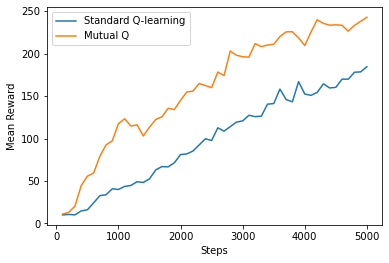

In [18]:
xticks = np.arange(1, 51) * 100

q_std = np.std(data, axis=0).T[2]
q_mean = np.mean(data, axis=0).T[2]
plt.plot(xticks, q_mean, label='Standard Q-learning')

mut_std  = np.std(data, axis=0).T[0]
mut_mean = np.mean(data, axis=0).T[0]
plt.plot(xticks, mut_mean, label='Mutual Q')

plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()

plt.savefig('./figs/q_mutual_comparison.png')

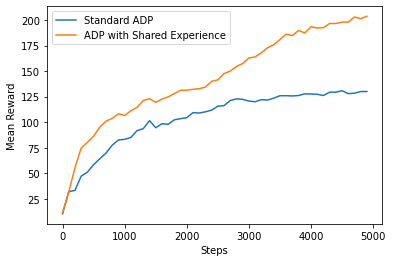

In [19]:
xticks = np.arange(50) * 100

adp_std = np.std(data, axis=0).T[3]
adp_mean = np.mean(data, axis=0).T[3]
plt.plot(xticks, adp_mean, label='Standard ADP')

share_std  = np.std(data, axis=0).T[1]
share_mean = np.mean(data, axis=0).T[1]
plt.plot(xticks, share_mean, label='ADP with Shared Experience')

plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()

plt.savefig('./figs/adp_mutual_comparison.png')

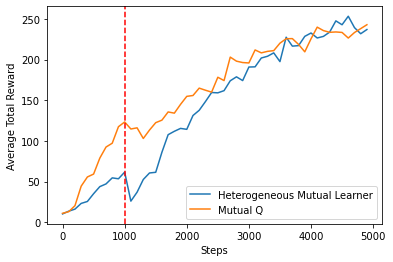

In [20]:
plt.plot(xticks, np.mean(data, axis=0).T[4], label='Heterogeneous Mutual Learner')
plt.plot(xticks, mut_mean, label='Mutual Q')
plt.legend()

plt.axvline(1000, ls='--', color='r')

plt.xlabel('Steps')
plt.ylabel('Average Total Reward')

plt.savefig('./figs/dip.png')

In [21]:
data_diff_opts = pickle.load(open('./results/1605078145.785886_separate_optimizers_100.pickle', 'rb'))
print(data_diff_opts['names'])

['q_mutual', 'adp_sharing_tuples', 'q_standard', 'single_agent_mutual']


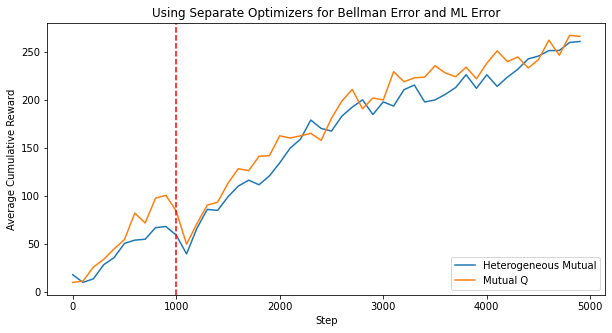

In [22]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(xticks, np.mean(data_diff_opts['results'], axis=0).T[3], label='Heterogeneous Mutual')
ax1.plot(xticks, np.mean(data_diff_opts['results'], axis=0).T[0], label='Mutual Q')
#ax1.plot(xticks, np.mean(data_diff_opts['results'], axis=0).T[1], label='Mutual ADP')
#ax1.plot(xticks, np.mean(data_diff_opts['results'], axis=0).T[2], label='Standard Q')

ax1.axvline(1000, ls='--', color='red')
ax1.legend()

ax1.set_xlabel('Step')
ax1.set_ylabel('Average Cumulative Reward')
ax1.set_title('Using Separate Optimizers for Bellman Error and ML Error')
plt.savefig('./diffopts.png')

In [23]:
data_decay = pickle.load(open('./results/1605690933.4896736_decay_weight.pickle', 'rb'))
data_decay['names']

['q_mutual', 'adp_sharing_tuples', 'q_standard', 'single_agent_mutual']

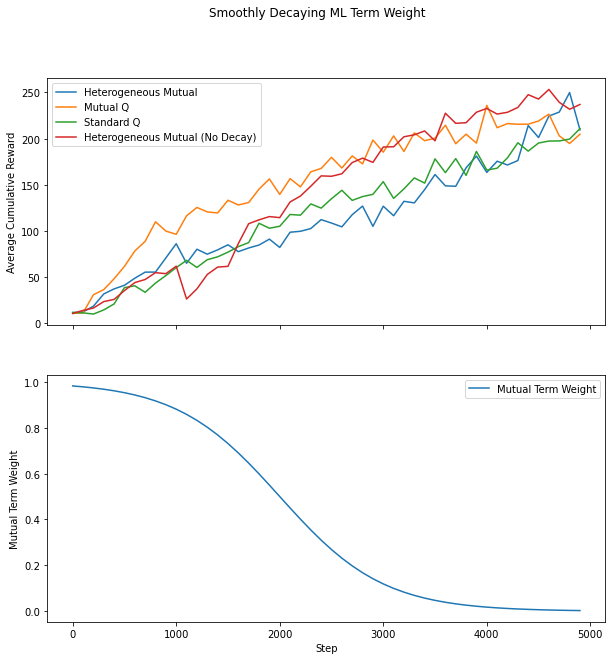

In [24]:
xticks = np.arange(50) * 100

fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(10,10), sharex=True)
fig.suptitle('Smoothly Decaying ML Term Weight')
ax1.plot(xticks, np.mean(data_decay['results'], axis=0).T[3], label='Heterogeneous Mutual')
ax1.plot(xticks, np.mean(data_decay['results'], axis=0).T[0], label='Mutual Q')
#ax1.plot(xticks, np.mean(data_decay['results'], axis=0).T[1], label='Mutual ADP')
ax1.plot(xticks, np.mean(data_decay['results'], axis=0).T[2], label='Standard Q')
ax1.plot(xticks, np.mean(data, axis=0).T[4], label='Heterogeneous Mutual (No Decay)')

ax1.set_ylabel('Average Cumulative Reward')

#ax2 = ax1.twinx()
decay = (-1 / (1 + np.e ** ((-(xticks - 2000))/500))) + 1
ax2.plot(xticks, decay, label='Mutual Term Weight')

ax2.set_xlabel('Step')
ax2.set_ylabel('Mutual Term Weight')
ax2.legend()
ax1.legend()

plt.savefig('decay_dip.png')